In [478]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [479]:
#Loading  Train database
Train=pd.read_excel('Food_Data_Train1.xls')
Train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am Ð 4pm, 7:30pm Ð 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm Ð 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am Ð 3:30pm, 7pm Ð 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am Ð 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am Ð 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon Ð 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon Ð 1am (Mon-Fri),11am Ð 5pm, 7pm Ð 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon Ð 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am Ð 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [458]:
#Loading  Test database
Test=pd.read_excel('Food_Data_Test1.xls')
Test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon Ð 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am Ð 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am Ð 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am Ð 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am Ð 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am Ð 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am Ð 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am Ð 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am Ð 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [459]:
# Name of the Train and Test DataBase  columns.
print("Train DataBase  columns" )
print(Train.columns)
print("")
print("")
print("Test DataBase  columns")
print(Test.columns)

Train DataBase  columns
Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')


Test DataBase  columns
Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')


In [460]:
# Shape of the Train and Test database .
print ("Shape of the Train database ")
print(Train.shape)
print(" ")
print ("Shape of the Test database ")
print(Test.shape)


Shape of the Train database 
(12690, 9)
 
Shape of the Test database 
(4231, 8)


In [461]:
#information of the  Train database
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [462]:
#datatypes of both databases.
print("Datatypes of Train Database")
print(Train.dtypes)
print( " ")
print("Datatypes of Test Database")
print(Test.dtypes)

Datatypes of Train Database
TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object
 
Datatypes of Test Database
TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object


In [463]:
#finding null values in the database

print( "Null values in Train Database")
print(Train.isnull().sum())
print( " ")
print( "Null values in Test Database")
print(Test.isnull().sum())

Null values in Train Database
TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64
 
Null values in Test Database
TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64


In [464]:
# Droping Null values from Train Database.
Train=Train.dropna(axis=0)

In [465]:
# Droping Null values from Test Database.
Test=Test.dropna(axis=0)

In [466]:
# Shape of the Train and Test database .
print ("Shape of the Train database ")
print(Train.shape)
print(" ")
print ("Shape of the Test database ")
print(Test.shape)

Shape of the Train database 
(11393, 9)
 
Shape of the Test database 
(3797, 8)


In [467]:
Train.describe()

,RESTAURANT_ID,COST
count,11393.000000,11393.000000
mean,7791.278329,682.670148
std,4508.401395,646.942238
min,0.000000,50.000000
25%,3883.000000,300.000000
50%,7807.000000,500.000000
75%,11730.000000,800.000000
max,15573.000000,14000.000000


In [468]:
# Correlation of Train Database.
Train.corr()

,RESTAURANT_ID,COST
RESTAURANT_ID,1.0000,0.0411
COST,0.0411,1.0000


{'bodies': [<matplotlib.collections.PolyCollection at 0x1f847cb30c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f8472f60c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f847cb3f48>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f847cb0ec8>}

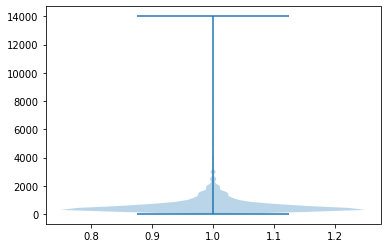

In [488]:
# Making Violinplot  of COST.
plt.violinplot(Train["COST"])

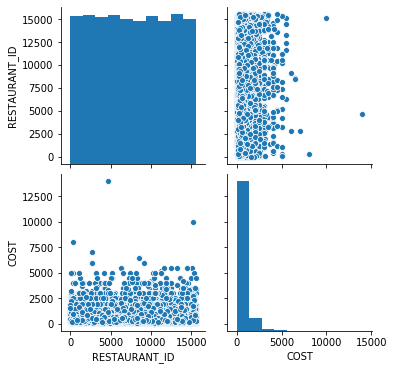

In [487]:
# Making Pairplot.
sns.pairplot(Train)

In [415]:
# Adding Both Databases.
df=Train.append(Test)

# VOTES COLUMN

In [416]:
# In VOTES column we only require number.
df['VOTES'] = df['VOTES'].str.replace(' votes', '').astype(str)

# CUISINES COLUMN

In [417]:
# In the CUISINES we have combination of cuisines so we will extract data and put it into different columns.
df['CUISINES_1'] =df['CUISINES'].str.split(', ').str[0]
df['CUISINES_2'] =df['CUISINES'].str.split(', ').str[1]
df['CUISINES_3'] =df['CUISINES'].str.split(', ').str[2]
df['CUISINES_4'] =df['CUISINES'].str.split(', ').str[3]
df['CUISINES_5'] =df['CUISINES'].str.split(', ').str[4]
df['CUISINES_6'] =df['CUISINES'].str.split(', ').str[5]
df['CUISINES_7'] =df['CUISINES'].str.split(', ').str[6]

In [418]:
# Droping Route column.
df=df.drop(['CUISINES'],axis=1)

In [419]:
df['CUISINES_1'].fillna('None',inplace =True)
df['CUISINES_2'].fillna('None',inplace =True)
df['CUISINES_3'].fillna('None',inplace =True)
df['CUISINES_4'].fillna('None',inplace =True)
df['CUISINES_5'].fillna('None',inplace =True)
df['CUISINES_6'].fillna('None',inplace =True)
df['CUISINES_7'].fillna('None',inplace =True)



# TITLE COLUMN

In [420]:
# Extracting Data from TITLE column and put it into different columns.
df['TITLE_1'] =df['TITLE'].str.split(',').str[0]
df['TITLE_2'] =df['TITLE'].str.split(',').str[1]
df['TITLE_3'] =df['TITLE'].str.split(',').str[2]

In [421]:
df['TITLE_1'].fillna('None',inplace =True)
df['TITLE_2'].fillna('None',inplace =True)
df['TITLE_3'].fillna('None',inplace =True)


In [422]:
#Droping TITLE column
df=df.drop(['TITLE'],axis=1)

In [423]:
#Droping  'RESTAURANT_ID','TIME' Column
df=df.drop(['RESTAURANT_ID','TIME'],axis=1)

In [424]:
#Using Label Encoder 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['CITY','LOCALITY', 'CUISINES_1', 'CUISINES_2','CUISINES_3' ,'CUISINES_4','CUISINES_5','CUISINES_6','CUISINES_7','TITLE_1','TITLE_2','TITLE_3']
for val in list1:
     df[val]=le.fit_transform(df[val].astype(str))

In [425]:
df

,CITY,LOCALITY,RATING,VOTES,COST,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,TITLE_1,TITLE_2,TITLE_3
0,373,307,3.6,49,1200.0,59,32,71,64,62,64,49,5,16,0
1,71,1106,4.2,30,1500.0,5,62,44,64,62,64,49,5,1,0
2,71,1163,3.8,221,800.0,71,23,14,34,62,64,49,5,16,0
3,256,150,4.1,24,800.0,99,23,69,64,62,64,49,23,16,0
4,256,654,3.8,165,300.0,29,67,69,64,62,64,49,9,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,256,398,4,197,NaN,71,64,23,64,62,64,49,23,16,0
4226,294,1079,3.9,287,NaN,71,64,23,64,62,64,49,5,16,0
4227,39,427,4.3,469,NaN,14,69,82,72,83,64,49,20,16,0
4228,123,1256,3.7,53,NaN,28,69,69,64,62,64,49,23,16,0


In [426]:
# Splitting Test and Train database.
Train=df[0:11393]
Test=df[3797:]
Test=Test.drop(['COST'],axis=1)

In [427]:
x=Train.drop(['COST'],axis=1)
y=Train["COST"]

# Splitting Data into target and Input

In [428]:
x

,CITY,LOCALITY,RATING,VOTES,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,TITLE_1,TITLE_2,TITLE_3
0,373,307,3.6,49,59,32,71,64,62,64,49,5,16,0
1,71,1106,4.2,30,5,62,44,64,62,64,49,5,1,0
2,71,1163,3.8,221,71,23,14,34,62,64,49,5,16,0
3,256,150,4.1,24,99,23,69,64,62,64,49,23,16,0
4,256,654,3.8,165,29,67,69,64,62,64,49,9,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,154,364,3.8,546,71,17,47,64,62,64,49,23,16,0
12686,256,147,4.3,1214,37,25,69,64,62,64,49,5,1,0
12687,278,1420,4,608,34,25,5,19,62,64,49,16,16,0
12688,71,665,3.5,32,71,87,23,80,62,64,49,5,16,0


In [429]:
y

0        1200.0
1        1500.0
2         800.0
3         800.0
4         300.0
          ...  
12685     500.0
12686    1800.0
12687    1300.0
12688     400.0
12689     600.0
Name: COST, Length: 11393, dtype: float64

In [430]:
# standard scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler(copy=True, with_mean=True, with_std=True)


# Importing Necessary libraries

In [431]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

In [432]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x,y)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print(" We are getting maximum  r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [434]:
# using Grid search CV to find best  parameters of different algorithim .
knn=KNeighborsRegressor()
parameters={"n_neighbors" :(5,20) , 'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute']}
gd=GridSearchCV(knn,parameters)
gd.fit(x,y)
print(" Best parameters of KNeighborsRegressor is :-")
print(gd.best_params_)
print("\n")

lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1] , 'selection' : ['cyclic', 'random']}
gd=GridSearchCV(lsreg,parameters)
gd.fit(x,y)
print(" Best parameters of Lasso is :-")
print(gd.best_params_)
print("\n")

dtc=DecisionTreeRegressor()
parameters={"criterion" :( 'mse', 'friedman_mse', 'mae') ,'max_features' : ['auto', 'sqrt', 'log2']}
gd=GridSearchCV(dtc,parameters)
gd.fit(x,y)
print(" Best parameters of DecisionTreeRegressor is :-")
print(gd.best_params_)
print("\n")

#Best parameters for  AdaBoostRegressor
ada=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[25,50,100,150,200]}
gd=GridSearchCV(ada,parameters)
gd.fit(x,y)
print(" Best parameters of AdaBoostRegressor is :-")
print(gd.best_params_)
print("\n")

 Best parameters of KNeighborsRegressor is :-
{'algorithm': 'auto', 'n_neighbors': 20}


 Best parameters of Lasso is :-
{'alpha': 0.001, 'selection': 'cyclic'}


 Best parameters of DecisionTreeRegressor is :-
{'criterion': 'mse', 'max_features': 'auto'}


 Best parameters of AdaBoostRegressor is :-
{'learning_rate': 0.1, 'n_estimators': 25}




In [441]:
# Finding best r2 score value for Linear Regression 
print("Linear Regression")
print("................. ")
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)
print(" ")
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print(" ")
print("#############################################################################")
print(" ")


# Finding best r2 score value for KNeighbors regressor 
print("KNeighbors regressor ")
print("..................... ")
knn=KNeighborsRegressor(n_neighbors= 20 , algorithm = 'auto')
i=maxr2_score(knn,x,y)
print(" ")
from sklearn.model_selection import cross_val_score
print("Mean r2 score for KNeighbor  Regression:",cross_val_score(knn,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(knn,x,y,cv=5,scoring="r2").std())
print(" ")
print("##############################################################################")
print(" ")


# Finding best r2 score value for Lasso Regressor 
print("Lasso Regressor")
print("................ ")
lsreg=Lasso(alpha=0.001 , selection = 'cyclic')
i=maxr2_score(lsreg,x,y)
print(" ")
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=63,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print(" ")
print("################################################################################")
print(" ")

# Finding best r2 score value for DecisionTreeRegressor
print("DecisionTreeRegressor")
print("...................... ")
dtc=DecisionTreeRegressor(criterion = 'mse'  , max_features = 'auto')
i=maxr2_score(dtc,x,y)
print(" ")
from sklearn.model_selection import cross_val_score
print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(dtc,x,y,cv=52,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(dtc,x,y,cv=5,scoring="r2").std())
print(" ")
print("#################################################################################")
print(" ")




Linear Regression
................. 
 We are getting maximum  r2 score corresponding to 43 is 0.2603896997083557
 
Mean r2 score for Linear Regression: 0.20679754927447025
standard deviation in r2 score for Linear Regression 0.018899588045246926
 
#############################################################################
 
KNeighbors regressor 
..................... 
 We are getting maximum  r2 score corresponding to 43 is 0.2578151986651419
 
Mean r2 score for KNeighbor  Regression: 0.13704661716409278
standard deviation in r2 score for KNeighbor   Regression 0.021872884817232763
 
##############################################################################
 
Lasso Regressor
................ 
 We are getting maximum  r2 score corresponding to 43 is 0.2603897426792112
 
Mean r2 score for Lasso Regression: 0.2221580698380778
standard deviation in r2 score for Lasso Regression 0.018899719319717647
 
################################################################################
 
D

In [442]:
# Finding best r2 score value for  AdaBoostRegressor
print("AdaBoostRegressor")
print(".................. ")
ada=AdaBoostRegressor(n_estimators=25 , learning_rate = 0.1)
i=maxr2_score(ada,x,y)
print(" ")
print("Mean r2 score for AdaBoostRegressor :",cross_val_score(ada,x,y,cv=10,scoring="r2").mean())
print("standard deviation in r2 score for AdaBoostRegressor ",cross_val_score(ada,x,y,cv=5,scoring="r2").std())
print(" ")
print("#####################################################################################") 

AdaBoostRegressor
.................. 
 We are getting maximum  r2 score corresponding to 80 is 0.5983334153141975
 
Mean r2 score for AdaBoostRegressor : 0.5373444498894423
standard deviation in r2 score for AdaBoostRegressor  0.027326633335092245
 
#####################################################################################


In [444]:
# Finding best r2 score value for  RandomForestRegressor
print("RandomForestRegressor")
print(".................. ")
rfr=RandomForestRegressor()
i=maxr2_score(rfr,x,y)
print(" ")
print("Mean r2 score for RandomForestRegressor :",cross_val_score(rfr,x,y,cv=10,scoring="r2").mean())
print("standard deviation in r2 score for RandomForestRegressor ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())
print(" ")
print("#####################################################################################")

RandomForestRegressor
.................. 
 We are getting maximum  r2 score corresponding to 89 is 0.9659387406273141
 
Mean r2 score for RandomForestRegressor : 0.699428046377709
standard deviation in r2 score for RandomForestRegressor  0.04464733280073512
 
#####################################################################################


# Since RandomForestRegressor is giving better result so we will use it as final model

In [445]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=0.20)
rfr=RandomForestRegressor()
rfr.fit(x,y)
y_pred=dtc.predict(x_test)

In [446]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is:  0.0
r2_score is: 1.0


# Saving the model

In [447]:
from sklearn.externals import joblib
joblib.dump(rfr,"Restaurant_food.pkl")

['Restaurant_food.pkl']

# Loading Model

In [448]:
model=joblib.load('Restaurant_food.pkl')

# Using Model to predict data

In [449]:
db=model.predict(Test)
db

array([126. , 325. , 831.5, ..., 704.5, 411. , 361.5])

# Saving Prediction in csv file

In [450]:
dft=pd.DataFrame(db)
dft.to_csv("Restaurant_food1.csv")